<a href="https://colab.research.google.com/github/jurbano001/Hot-Dog-Cookout-Calculator/blob/main/TF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 

url = 'https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv'
df = pd.read_csv(url)
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7024,p,x,s,n,f,y,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
971,e,x,f,n,t,n,f,c,b,n,...,s,p,w,p,w,o,p,k,v,d
5692,e,k,y,p,t,n,f,c,b,w,...,s,w,w,p,w,t,e,w,c,w
1907,e,x,f,n,t,n,f,c,b,w,...,s,w,p,p,w,o,p,n,v,d
7373,e,b,s,g,f,n,f,w,b,p,...,k,w,w,p,w,t,p,w,s,g


In [2]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [3]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9782
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 6.6340e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 1.3812e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 5.8113e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 3.1951e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 2.1075e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 1.4422e-05 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 1.0315e-05 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 7.4390e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [6]:
predictions = model.predict(X_test)

51/51 [==============================] - 0s 1ms/step


In [7]:
prediction_classes_class = [
    'p' if prob > 0.5 else 'e' for prob in np.ravel(predictions)
]
# convert prediction probabilities to binary predictions
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

prediction_classes


[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [8]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

[[843   0]
 [  0 782]]


In [9]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # decreasing learning rate
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9760
Epoch 2/100
204/204 [==============================] - 0s 2ms/step - loss: 7.7893e-04 - accuracy: 0.9998
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.1412e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 0s 2ms/step - loss: 5.4481e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 3.0556e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 0s 2ms/step - loss: 1.9296e-05 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 1.2942e-05 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 0s 2ms/step - loss: 8.9270e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 0s 2ms/step - loss: 6.4665e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 0s 

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), # adding another layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 2s 2ms/step - loss: 0.0593 - accuracy: 0.9838
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 7.6498e-04 - accuracy: 1.0000
Epoch 3/100
204/204 [==============================] - 0s 2ms/step - loss: 1.7735e-04 - accuracy: 1.0000
Epoch 4/100
204/204 [==============================] - 1s 2ms/step - loss: 1.7259e-05 - accuracy: 1.0000
Epoch 5/100
204/204 [==============================] - 0s 2ms/step - loss: 1.1455e-05 - accuracy: 1.0000
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 8.2673e-06 - accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 0s 2ms/step - loss: 6.1871e-06 - accuracy: 1.0000
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 4.7810e-06 - accuracy: 1.0000
Epoch 9/100
204/204 [==============================] - 1s 2ms/step - loss: 3.7723e-06 - accuracy: 1.0000
Epoch 10/100
204/204 [==============================] - 1s 

In [12]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_l1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

history_l1 = model_l1.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stop]
)

Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 1.2330 - accuracy: 0.9677 - val_loss: 0.3981 - val_accuracy: 0.9982
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.9977 - val_loss: 0.2085 - val_accuracy: 0.9988
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1722 - accuracy: 0.9983 - val_loss: 0.1429 - val_accuracy: 0.9994
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1256 - accuracy: 0.9988 - val_loss: 0.1089 - val_accuracy: 0.9994
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9992 - val_loss: 0.0890 - val_accuracy: 0.9994
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9992 - val_loss: 0.0785 - val_accuracy: 1.0000
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9995 - val_loss: 0.0643 - val_accuracy: 1.0000

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    tf.keras.layers.Dropout(0.9),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=1,
    patience=10,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])


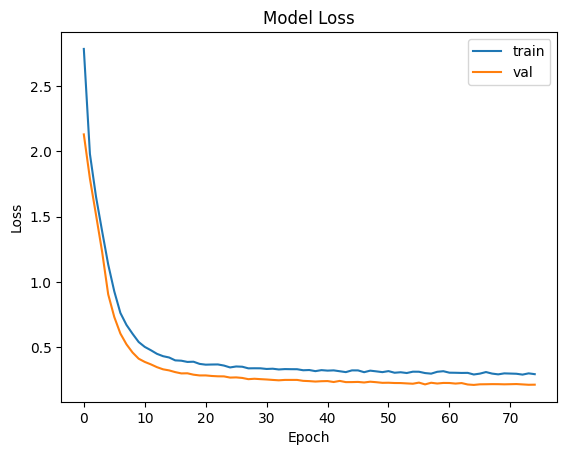

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


In [ ]:
model.save('mushroom_classification_model.h5')

In [ ]:
new_data = pd.DataFrame({
    'cap-shape': ['f'], 
    'cap-surface': ['y'], 
    'cap-color': ['n'], 
    'bruises': ['f'], 
    'odor': ['a'], 
    'gill-attachment': ['f'], 
    'gill-spacing': ['c'], 
    'gill-size': ['n'], 
    'gill-color': ['b'], 
    'stalk-shape': ['e'], 
    'stalk-root': ['c'], 
    'stalk-surface-above-ring': ['s'], 
    'stalk-surface-below-ring': ['s'], 
    'stalk-color-above-ring': ['w'], 
    'stalk-color-below-ring': ['w'], 
    'veil-type': ['p'], 
    'veil-color': ['w'], 
    'ring-number': ['o'], 
    'ring-type': ['p'], 
    'spore-print-color': ['n'], 
    'population': ['c'], 
    'habitat': ['l']
})

In [ ]:
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

In [ ]:
loaded_model = tf.keras.models.load_model('mushroom_classification_model.h5')
prediction = loaded_model.predict(new_data_encoded)
prediction_class = int(prediction > 0.5)

print('Prediction:', prediction_class)

1/1 [==============================] - 0s 78ms/step
Prediction: 1
